In [182]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import time

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import LearningCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import f1_score

In [183]:
# Load the Heart Disease dataset
# Define the column names (headers)
df = pd.read_csv('wine_quality.csv', encoding='utf-8')

y = df['quality']
X = df[['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


y_train_numpy = y_train.to_numpy()

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train_numpy)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test.to_numpy())

# Create a DataLoader for PyTorch
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

<Axes: >

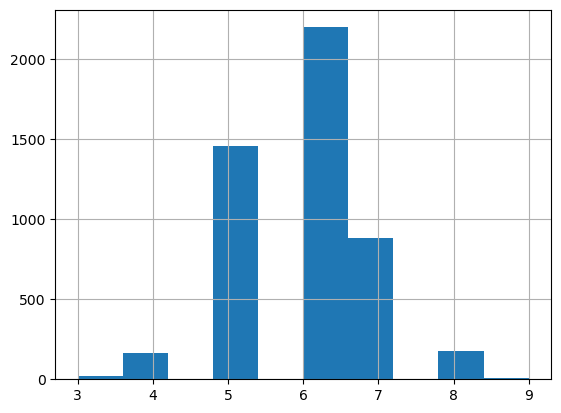

In [21]:
y.hist()

0.5678917815211842
f1 score dt_classifier: 0.46045075384078915
0.9989790709545686
f1 score dt grid search: 0.552114359648995
[[  0   3   3   2   1   0   0]
 [  0  10  24  14   1   0   2]
 [  2  15 185  74  18   0   1]
 [  3   3  89 243  59  12   0]
 [  0   1  17  64  95   5   1]
 [  0   0   8   8   5  12   0]
 [  0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.31      0.20      0.24        51
           5       0.57      0.63      0.60       295
           6       0.60      0.59      0.60       409
           7       0.53      0.52      0.52       183
           8       0.41      0.36      0.39        33
           9       0.00      0.00      0.00         0

    accuracy                           0.56       980
   macro avg       0.35      0.33      0.34       980
weighted avg       0.55      0.56      0.55       980

[0.58766968 0.596624   0.58522285 0.59602253 0.59721234]
0.5

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


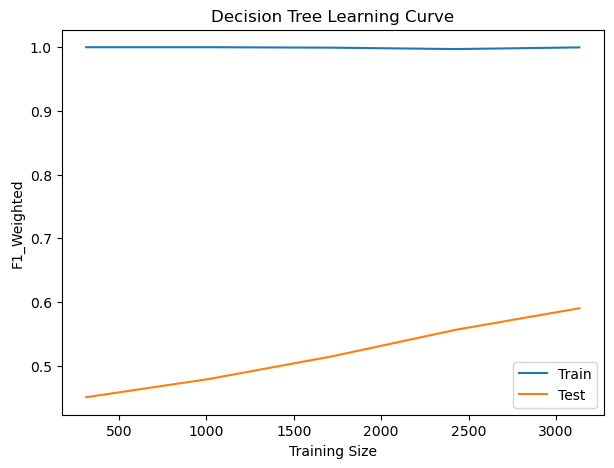

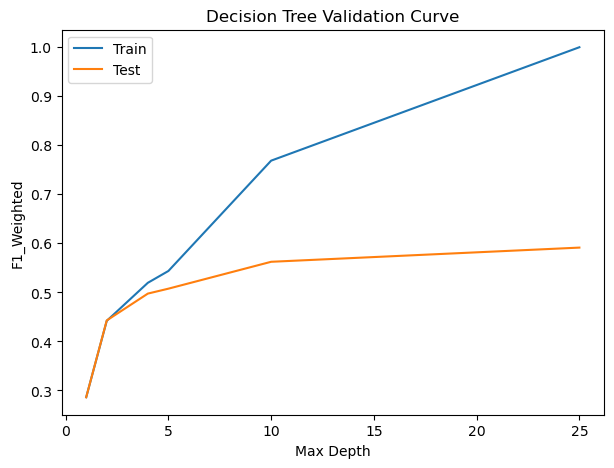

Accuracy: 0.5561224489795918
Wall Clock Time: 
Training Time: 0.10248422622680664 seconds
Testing Time:  0.000 seconds


In [88]:
# Decision Tree Classifier
dt_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10],
                 'criterion': ['gini', 'entropy'], 'ccp_alpha': [0, 0.001, 0.005, 0.1, 0.5, 1]}

dt_classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005, criterion='entropy')
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(dt_classifier.score(X_train, y_train))
print("f1 score dt_classifier:", f1_score(y_test, y_pred, average='weighted'))

dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dtgs = dt_grid_search.best_estimator_.fit(X_train, y_train)
dtgs.fit(X_train, y_train)
print(dtgs.score(X_train, y_train))
y_pred = dtgs.predict(X_test)
print("f1 score dt grid search:", f1_score(y_test, y_pred, average='weighted'))
dt_cross_val_scores = cross_val_score(dtgs, X=X_train, y=y_train, cv=5, scoring='f1_weighted')


print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

# Print cross-validation scores
print(dt_cross_val_scores)  # Print accuracy for each fold
print(dt_cross_val_scores.mean())  # Print mean of accuracies for all folds
print(dt_cross_val_scores.std())  # Print SD for mean of all accuracies

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dtgs, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('F1_Weighted')
plt.legend()
plt.title('Decision Tree Learning Curve')
plt.show()

# Validation Curve
param_range = [1, 2, 4, 5, 10, 25]  # Vary the max_depth parameter
train_scores, test_scores = validation_curve(
    dtgs, X_train, y_train, param_name="max_depth", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(7, 5))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Max Depth')
plt.ylabel('F1_Weighted')
plt.legend()
plt.title('Decision Tree Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
dtgs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = dtgs.predict(X_test)
testing_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print('Wall Clock Time: ')
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time: .3f} seconds")

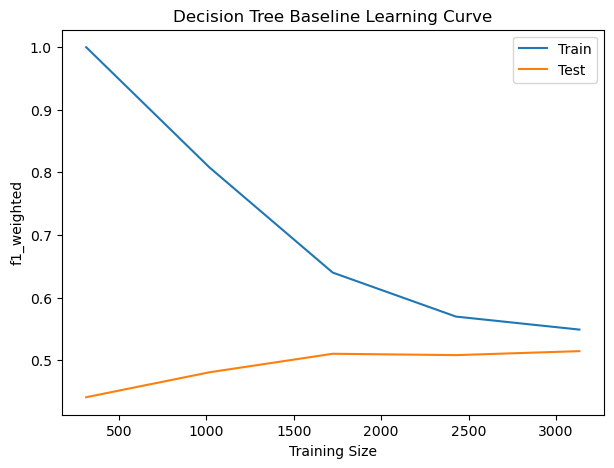

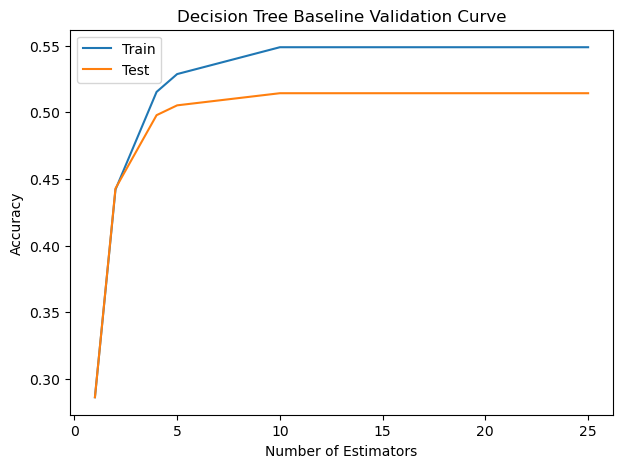

In [65]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_classifier, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)
plt.figure(figsize=(7, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('Decision Tree Baseline Learning Curve')
plt.show()

# Validation Curve
param_range = [1, 2, 4, 5, 10, 25]  # Vary the max_depth parameter
train_scores, test_scores = validation_curve(
    dt_classifier, X_train, y_train, param_name="max_depth", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(7, 5))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Decision Tree Baseline Validation Curve')
plt.show()

In [86]:
dt_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=20,
                       random_state=42)

In [184]:
# MLP Classifier (Neural Network)
mlp_classifier = MLPClassifier(max_iter=1000, early_stopping=True, learning_rate_init=0.001, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
mlp_classifier.fit(X_train_tensor, y_train_tensor)
y_pred = mlp_classifier.predict(X_test)
print('Initial F1 Score:', f1_score(y_test, y_pred, average='weighted'))
mlp_param_grid = {'hidden_layer_sizes': [(64, 32), (128, 64, 32)],
                  'alpha': [0.0001, 0.001, 0.01],
                 'activation': ['identity', 'logistic', 'tanh'],
                 'solver': ['sgd', 'adam'],
                 'learning_rate': ['constant', 'adaptive']}
mlp_grid_search = GridSearchCV(mlp_classifier, mlp_param_grid, cv=5, scoring='f1_weighted')
mlp_grid_search.fit(X_train_tensor, y_train_tensor)
mlpgs = mlp_grid_search.best_estimator_.fit(X_train_tensor, y_train_tensor)
y_pred = mlpgs.predict(X_test)
print("Final F1 Score:", f1_score(y_test, y_pred, average='weighted'))
mlp_cross_val_scores = cross_val_score(mlpgs, X=X_train, y=y_train, cv=5, scoring='f1_weighted')

print(mlp_cross_val_scores) # print accuracy for each fold
print(mlp_cross_val_scores.mean()) # print mean of accuracies for all folds
print(mlp_cross_val_scores.std()) # print SD for mean of all accuracies
print('\n')

y_pred = mlpgs.predict(X_test)
  
print(classification_report(y_test, y_pred))

Initial F1 Score: 0.47786457838491053
Final F1 Score: 0.45203245857272106
[0.53384169 0.53970328 0.52590416 0.5514072  0.52417728]
0.5350067213374464
0.009924960547286681


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        51
           5       0.54      0.53      0.53       295
           6       0.49      0.74      0.59       409
           7       0.44      0.17      0.25       183
           8       0.00      0.00      0.00        33

    accuracy                           0.50       980
   macro avg       0.24      0.24      0.23       980
weighted avg       0.45      0.50      0.45       980



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


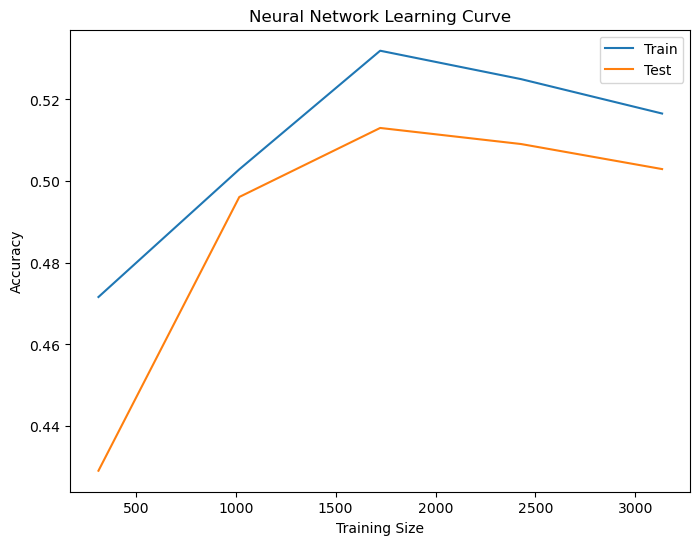

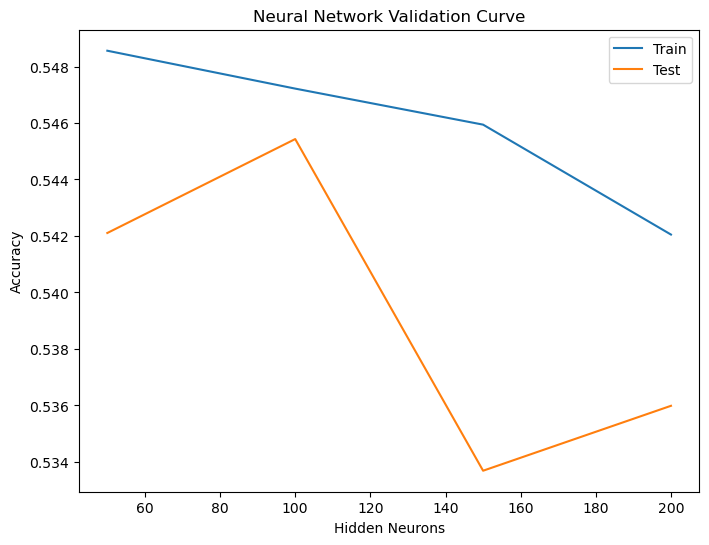

Training Time: 0.2837865352630615 seconds
Testing Time: 0.0030 seconds


In [185]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    mlpgs, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Learning Curve')
plt.show()

# Validation Curve
param_range = [50, 100, 150, 200]  # Vary the number of hidden neurons
train_scores, test_scores = validation_curve(
    mlpgs, X_train, y_train, param_name="hidden_layer_sizes", param_range=param_range,
    cv=5, scoring='accuracy')

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Hidden Neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
mlpgs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = mlpgs.predict(X_test)
testing_time = time.time() - start_time

print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

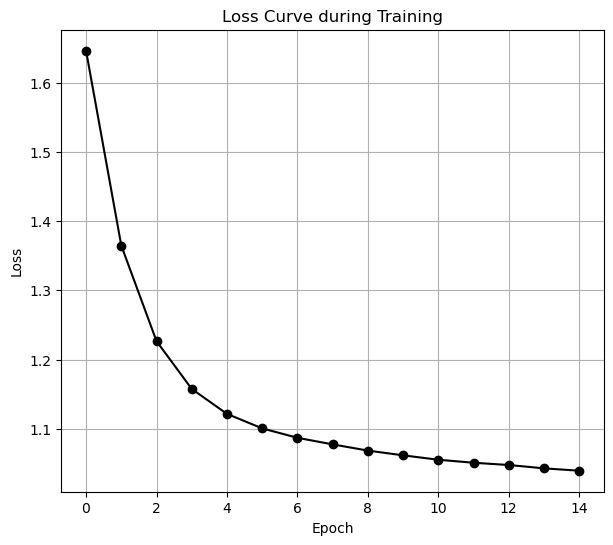

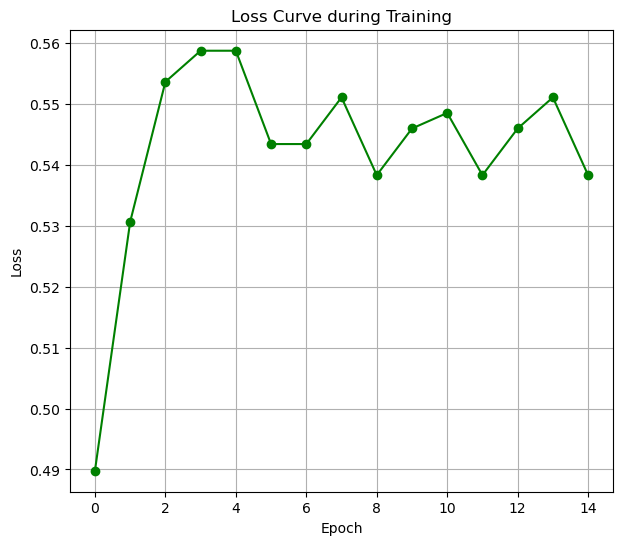

In [26]:
loss_curve = mlpgs.loss_curve_

# Plot the loss curve
plt.figure(figsize=(7, 6))
plt.plot(loss_curve, marker='o', color='black')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

val_curve = mlpgs.validation_scores_
plt.figure(figsize=(7, 6))
plt.plot(val_curve, marker='o', color='green')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

In [178]:
mlp_grid_search.best_estimator_

MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [162]:
# AdaBoosting Classifier

# Define a Decision Tree classifier (base learner)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Define an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)


adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))

adaboost_param_grid = {'n_estimators': [50, 100, 200],
                 'learning_rate': [0.5, 1.5, 2],
                 'algorithm': ['SAMME','SAMME.R']}
adaboost_grid_search = GridSearchCV(adaboost_classifier, adaboost_param_grid, cv=5, scoring='accuracy')
adaboost_grid_search.fit(X_train, y_train)
adabgs = adaboost_grid_search.best_estimator_.fit(X_train, y_train)

y_pred = adabgs.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))

adaboost_cross_val_scores = cross_val_score(adabgs, X=X_train, y=y_train, cv=5, scoring='accuracy')
print(adaboost_cross_val_scores) # print accuracy for each fold
print(adaboost_cross_val_scores.mean()) # print mean of accuracies for all folds
print(adaboost_cross_val_scores.std()) # print SD for mean of all accuracies


print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

0.35902291662721253
0.44258909748879116
[0.53061224 0.52295918 0.52168367 0.51596424 0.49042146]
0.5163281596163369
0.013769363339406543
[[  0   0   5   4   0   0]
 [  0   1  24  25   1   0]
 [  0   0 158 129   8   0]
 [  0   0  89 265  55   0]
 [  0   0  13 128  42   0]
 [  0   0   0  19  14   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.02      0.04        51
           5       0.55      0.54      0.54       295
           6       0.46      0.65      0.54       409
           7       0.35      0.23      0.28       183
           8       0.00      0.00      0.00        33

    accuracy                           0.48       980
   macro avg       0.39      0.24      0.23       980
weighted avg       0.48      0.48      0.44       980



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


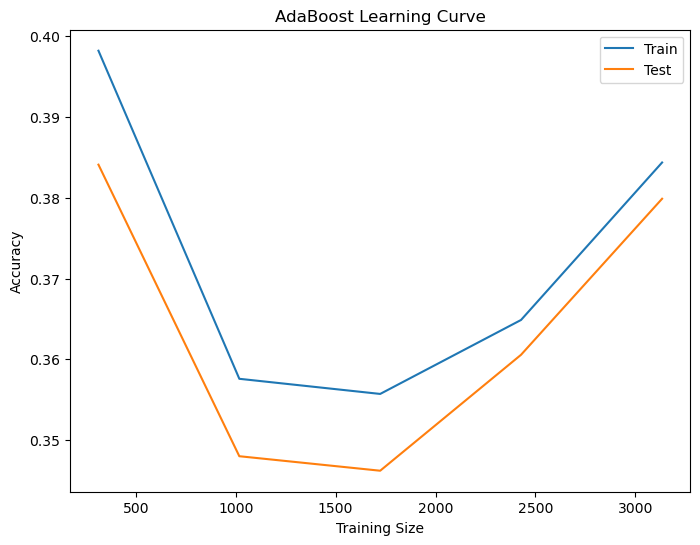

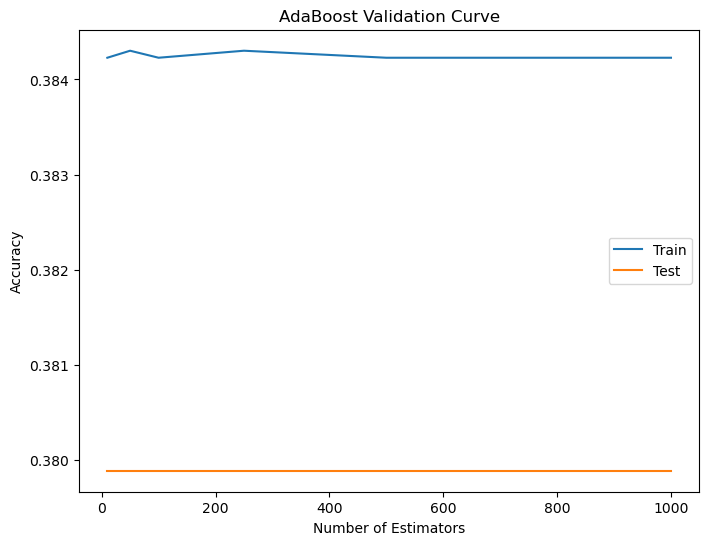

Accuracy: 0.47551020408163264
Training Time: 0.4296247959136963 seconds
Testing Time: 0.020796775817871094 seconds


In [159]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    adaboost_classifier, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('AdaBoost Learning Curve')
plt.show()

# Validation Curve
param_range = [10, 50, 100, 250, 500, 1000]  # Vary the number of estimators
train_scores, test_scores = validation_curve(
    adaboost_classifier, X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('AdaBoost Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
adabgs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = adabgs.predict(X_test)
testing_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

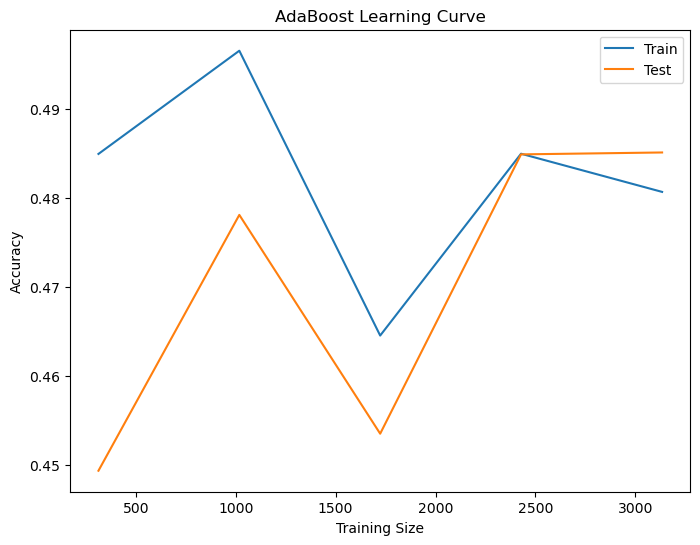

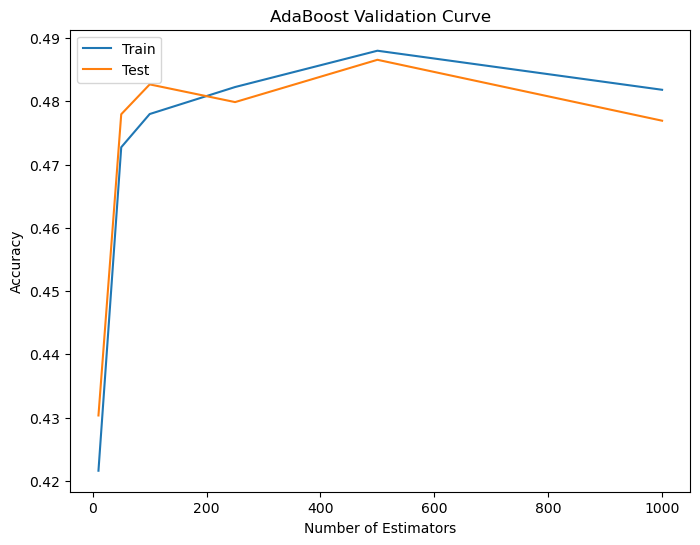

Accuracy: 0.47551020408163264
Training Time: 0.43450260162353516 seconds
Testing Time: 0.0201566219329834 seconds


In [160]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    adabgs, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('AdaBoost Learning Curve')
plt.show()

# Validation Curve
param_range = [10, 50, 100, 250, 500, 1000]  # Vary the number of estimators
train_scores, test_scores = validation_curve(
    adabgs, X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('AdaBoost Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
adabgs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = adabgs.predict(X_test)
testing_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

In [153]:
# Support Vector Classifier (SVC)
svc_param_grid = {'C': [0.1, 1],
                  'kernel': ['linear', 'rbf', 'sigmoid']
                 }
svc_classifier = SVC(probability=True, random_state=42, kernel='linear')
svc_classifier.fit(X_train, y_train)
print(svc_classifier.score(X_train, y_train))
svc_grid_search = GridSearchCV(svc_classifier, svc_param_grid, cv=5, scoring='f1_weighted')
svc_grid_search.fit(X_train, y_train)
svcgs = svc_grid_search.best_estimator_.fit(X_train, y_train)
print(svcgs.score(X_train, y_train))
svc_cross_val_scores = cross_val_score(svcgs, X=X_train, y=y_train, cv=5, scoring='f1_weighted')
print(svc_cross_val_scores) # print accuracy for each fold
print(svc_cross_val_scores.mean()) # print mean of accuracies for all folds
print(svc_cross_val_scores.std()) # print SD for mean of all accuracies

y_pred = svcgs.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

0.5296069423175089
0.6145992853496682
[0.52818538 0.54566275 0.53000219 0.5298605  0.52349277]
0.5314407169557945
0.0074913234546557265
[[  0   0   6   3   0   0]
 [  0   0  33  17   1   0]
 [  0   0 166 129   0   0]
 [  0   0  74 318  17   0]
 [  0   0   7 131  45   0]
 [  0   0   0  23  10   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        51
           5       0.58      0.56      0.57       295
           6       0.51      0.78      0.62       409
           7       0.62      0.25      0.35       183
           8       0.00      0.00      0.00        33

    accuracy                           0.54       980
   macro avg       0.28      0.26      0.26       980
weighted avg       0.50      0.54      0.50       980



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
svc_poly = SVC(kernel='rbf', C=1, random_state=42, probability=True)
svc_poly.fit(X_train, y_train)
y_pred = svc_poly.predict(X_test)
print('f1 score rbf', f1_score(y_test, y_pred, average='weighted')) 

f1 score poly 0.49536218253771697


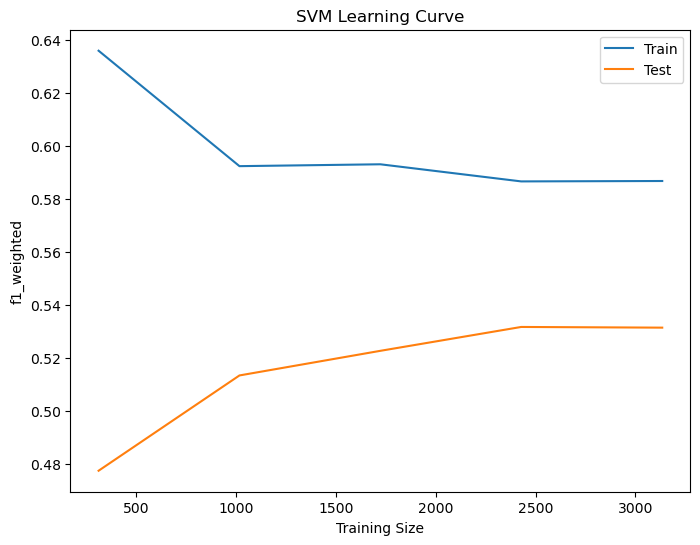

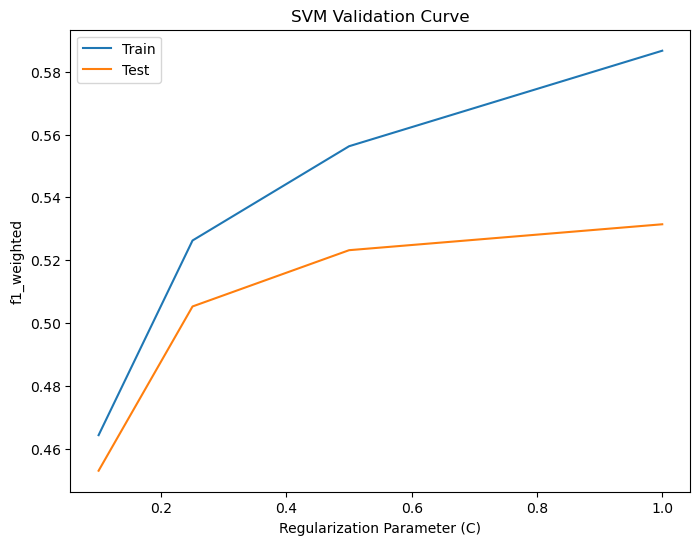

Accuracy: 0.539795918367347
Training Time: 6.528327465057373 seconds
Testing Time: 0.516165018081665 seconds


In [156]:
train_sizes, train_scores, test_scores = learning_curve(
    svc_poly, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('SVM Learning Curve')
plt.show()

# Validation Curve
param_range = [0.10, 0.25, 0.5, 1]  # Vary the regularization parameter C
train_scores, test_scores = validation_curve(
    svc_poly, X_train, y_train, param_name="C", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('SVM Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
svcgs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = svcgs.predict(X_test)
testing_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

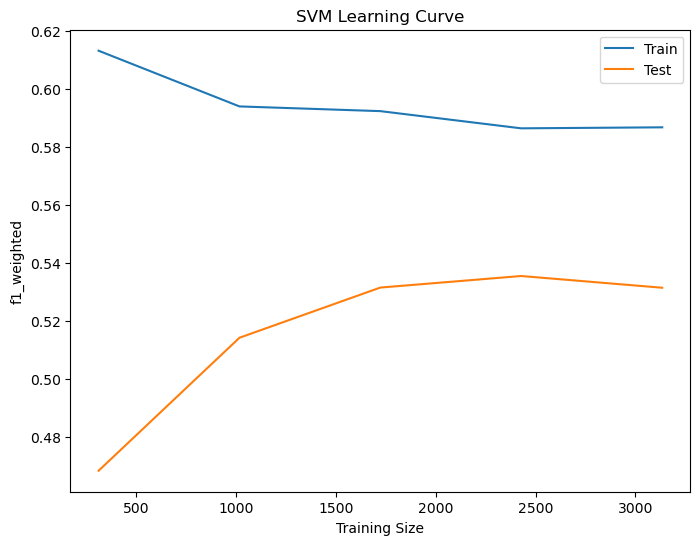

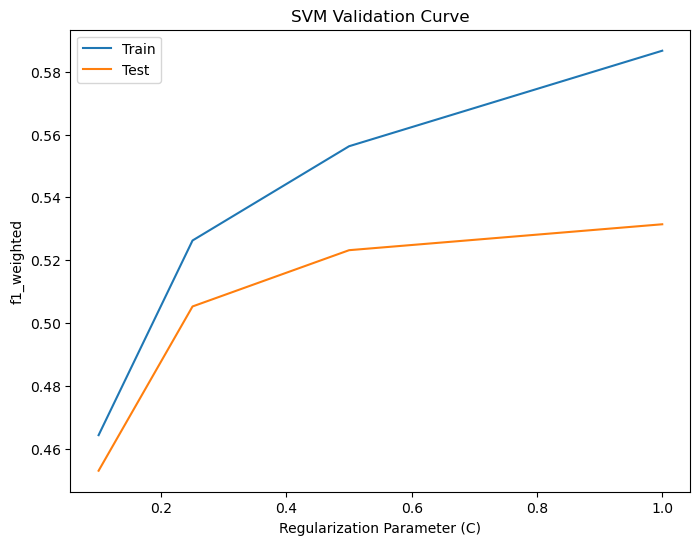

Accuracy: 0.539795918367347
Training Time: 5.14249587059021 seconds
Testing Time: 0.40136218070983887 seconds


In [30]:
train_sizes, train_scores, test_scores = learning_curve(
    svcgs, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('SVM Learning Curve')
plt.show()

# Validation Curve
param_range = [0.10, 0.25, 0.5, 1]  # Vary the regularization parameter C
train_scores, test_scores = validation_curve(
    svcgs, X_train, y_train, param_name="C", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('SVM Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
svcgs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = svcgs.predict(X_test)
testing_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

In [172]:
# k-Nearest Neighbors Classifier (KNN)
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 10, 25, 50, 75],
                  'weights': ['uniform', 'distance'],
                 'algorithm': ['ball_tree', 'kd_tree']}
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5, scoring='f1_weighted', return_train_score=True)
knn_grid_search.fit(X_train, y_train)
knngs = knn_grid_search.best_estimator_.fit(X_train, y_train)
y_pred = knngs.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
knnc_cross_val_scores = cross_val_score(knngs, X=X_train, y=y_train, cv=5, scoring='f1_weighted')
print(knnc_cross_val_scores) # print accuracy for each fold
print(knnc_cross_val_scores.mean()) # print mean of accuracies for all folds
print(knnc_cross_val_scores.std()) # print SD for mean of all accuracies

y_pred = knngs.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

0.5284729469243412
0.6296519864890046
[0.66942508 0.65063293 0.63372852 0.67224851 0.64523546]
0.654254100793724
0.01462672525100281
[[  0   0   5   4   0   0]
 [  0   4  29  16   2   0]
 [  0   0 196  95   4   0]
 [  0   0  57 336  16   0]
 [  0   0   4  82  97   0]
 [  0   0   0  17   9   7]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.08      0.15        51
           5       0.67      0.66      0.67       295
           6       0.61      0.82      0.70       409
           7       0.76      0.53      0.62       183
           8       1.00      0.21      0.35        33

    accuracy                           0.65       980
   macro avg       0.67      0.38      0.41       980
weighted avg       0.68      0.65      0.63       980



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
knn_grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=50, weights='distance')

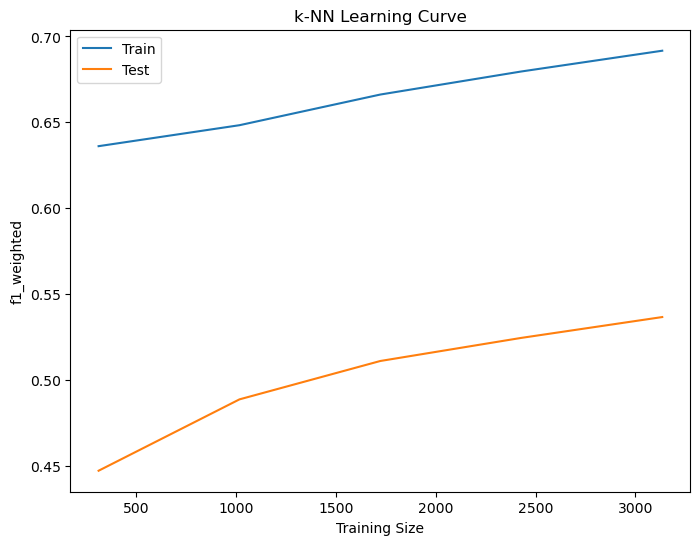

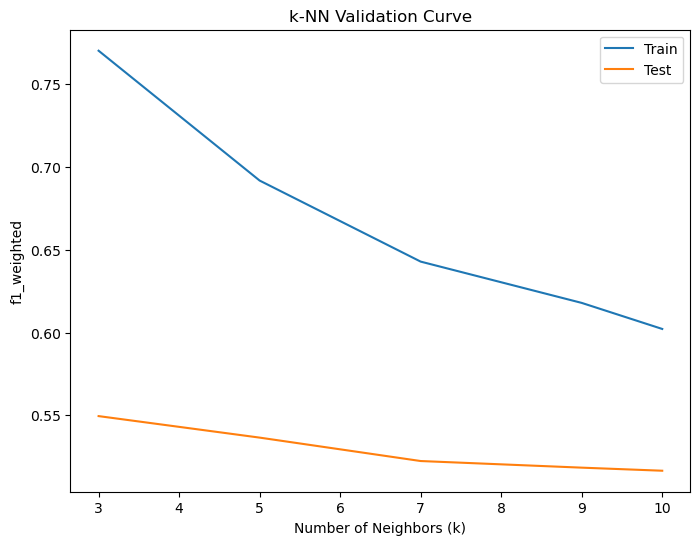

Accuracy: 0.5428571428571428
Training Time: 0.004997968673706055 seconds
Testing Time: 0.10156011581420898 seconds


In [166]:
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('k-NN Learning Curve')
plt.show()

# Validation Curve
param_range = [3, 5, 7, 9, 10]  # Vary the number of neighbors (k)
train_scores, test_scores = validation_curve(
    knn_classifier, X_train, y_train, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('k-NN Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
knngs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = knn_classifier.predict(X_test)
testing_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

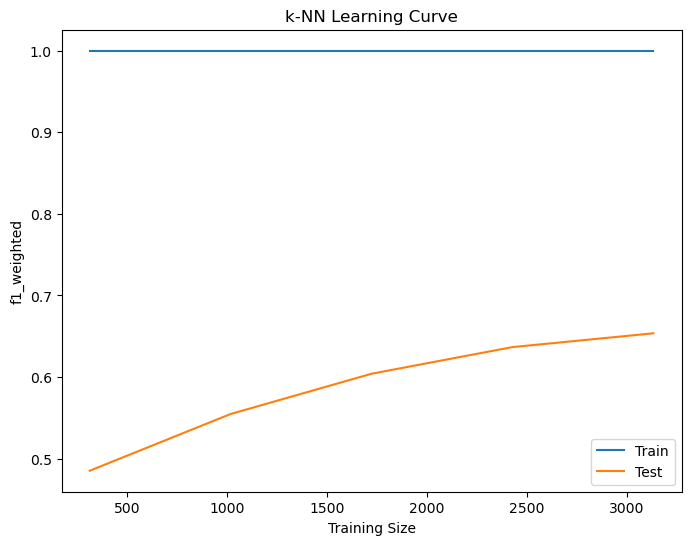

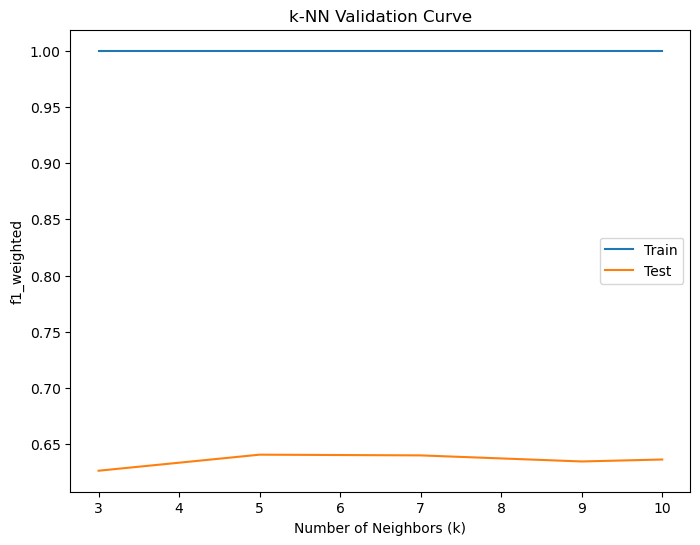

Accuracy: 0.6479591836734694
Training Time: 0.007275819778442383 seconds
Testing Time: 0.09236717224121094 seconds


In [164]:
train_sizes, train_scores, test_scores = learning_curve(
    knngs, X_train, y_train, cv=5, scoring='f1_weighted', shuffle=True)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Size')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('k-NN Learning Curve')
plt.show()

# Validation Curve
param_range = [3, 5, 7, 9, 10]  # Vary the number of neighbors (k)
train_scores, test_scores = validation_curve(
    knngs, X_train, y_train, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring='f1_weighted')

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('f1_weighted')
plt.legend()
plt.title('k-NN Validation Curve')
plt.show()

# Measure Wall Clock Time
start_time = time.time()
knngs.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = knngs.predict(X_test)
testing_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")